In [13]:
from src.LogNegManager import LogNegManager

In [14]:
generalOptions = {
    "numModes": 128,
    "plots_directory": "./plots/128-plots/",
    "data_directory": "./data/128-data/",
    "parallelize": True
  }

transformationMatrixOptions = {
    "DataDirectory": "./sims-128/",
    "InstantToPlot": -1
  }

initialStates = [
      {"Temperature":  0.0,
      "OneModeSqueezing": 0.0,
        "TwoModeSqueezing": 0.0},
      {"Temperature":  5.0,
      "OneModeSqueezing": 0.0,
        "TwoModeSqueezing": 0.0},
      {"Temperature":  10.0,
      "OneModeSqueezing": 0.0,
        "TwoModeSqueezing": 0.0}

    ]

measurements = [
    {"type": "fullLogNeg",
    "typeOfState":  1}
  ]

In [15]:
LNManager = LogNegManager(generalOptions=generalOptions, transformationDict=transformationMatrixOptions,
                          initialStates=initialStates)

In [16]:
dict_to_plot = {}
for measurement in measurements:
    if measurement["typeOfState"] == 0:
        dict_to_plot = LNManager.measureInitialStatesEntanglement(measurement["type"], measurement.get("modesToApply", None))
    else:
        dict_to_plot = LNManager.measureFinalStatesEntanglement(measurement["type"], measurement.get("modesToApply", None))

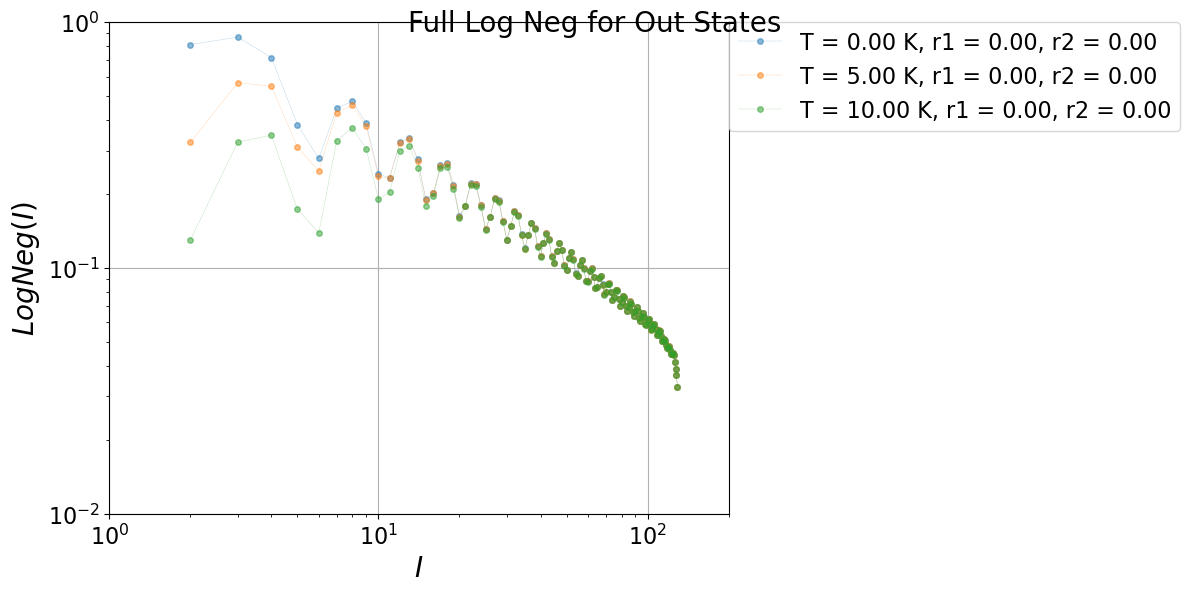

In [17]:
LNManager.plotResults(dict_to_plot)